#Handling imbalanced data in the prediction model_Customer Churn

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
path = '/content/Telco-Customer-Churn.csv'
df = pd.read_csv(path)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df.drop('customerID', axis = 'columns', inplace = True)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.iloc[344].TotalCharges

'865'

In [16]:
df[df.TotalCharges != ' '].shape

(7032, 20)

In [17]:
df.shape

(7043, 20)

In [18]:
df_new = df[df.TotalCharges != ' ']
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
df_new.TotalCharges.isnull().sum()

0

So, no more NaN, null values existing in TotalCharges

In [22]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df_new.TotalCharges = pd.to_numeric(df_new.TotalCharges)

<ipython-input-23-da7fbd9c6031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.TotalCharges = pd.to_numeric(df_new.TotalCharges)


In [24]:
df_new.TotalCharges.dtypes

dtype('float64')

In [25]:
df_new[df_new.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


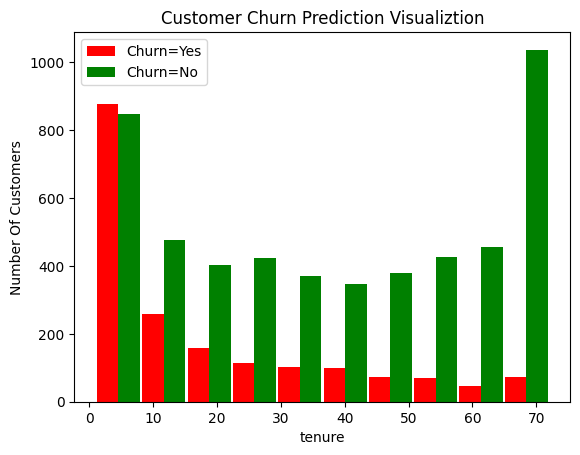

In [27]:
tenure_churn_no = df_new[df_new.Churn=='No'].tenure
tenure_churn_yes = df_new[df_new.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

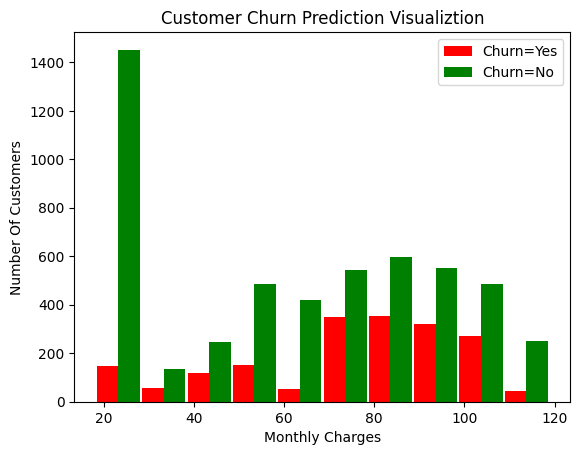

In [28]:
mc_churn_no = df_new[df_new.Churn=='No'].MonthlyCharges
mc_churn_yes = df_new[df_new.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [29]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [30]:
print_unique_col_values(df_new)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [31]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)

<ipython-input-31-c54f46312d67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No internet service','No',inplace=True)
<ipython-input-31-c54f46312d67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No phone service','No',inplace=True)


In [32]:
print_unique_col_values(df_new)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [36]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in yes_no_columns:
  df_new[i].replace({"Yes":1, "No":0},inplace = True)

<ipython-input-36-932305637d81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i].replace({"Yes":1, "No":0},inplace = True)


In [40]:
for i in df_new:
  print(f"{i}: {df_new[i].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [41]:
df_new['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-41-c413cdcba628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'].replace({'Female':1,'Male':0},inplace=True)


In [43]:
df_new.gender.unique()

array([1, 0])

In [44]:
#One hot encoding for categorical columns
df2 = pd.get_dummies(data=df_new, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [45]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5294,1,0,1,1,53,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
3388,1,0,1,0,65,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
4205,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2540,1,0,0,0,70,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
765,1,0,0,0,11,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [46]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [47]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [48]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [49]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [50]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [51]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [52]:
X_train.shape

(5625, 26)

In [53]:
X_test.shape

(1407, 26)

In [54]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [55]:
len(X_train.columns)

26

In [59]:
#Build a model (ANN) in tensorflow/keras
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [58]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 8s 8ms/step - loss: 0.4832 - accuracy: 0.7588
Epoch 2/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4297 - accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4219 - accuracy: 0.7966
Epoch 4/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4194 - accuracy: 0.7996
Epoch 5/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4161 - accuracy: 0.8027
Epoch 6/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4143 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4124 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4103 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4092 - accuracy: 0.8055
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4090 - accura

##Mitigating Skewdness of Data

###Method 1: Undersampling

In [65]:
count_class_0, count_class_1 = df_new.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [70]:
df_class_0.shape

(5163, 27)

In [73]:
df_class_1.shape

(1869, 27)

In [62]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [74]:
df_test_under.shape

(3738, 27)

In [63]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.5944 - accuracy: 0.7057
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5023 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4856 - accuracy: 0.7666
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4755 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4727 - accuracy: 0.7699
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4711 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4701 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.7739
Epoch 11/

f1-score for minority class 1 improved from **0.57** to **0.73**

###Method 2: Oversampling

In [66]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [67]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [69]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.7398
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4893 - accuracy: 0.7611
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4818 - accuracy: 0.7654
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4754 - accuracy: 0.7720
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7708
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4679 - accuracy: 0.7757
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4641 - accuracy: 0.7769
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4611 - accuracy: 0.7785
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.7799
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4543 - accura

 f1-score for minority class 1 improved from **0.57** to **0.80**

##Method 3: SMOTE

In [75]:
pip install imbalanced-Learn

In [77]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [89]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [90]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 4s 7ms/step - loss: 0.5412 - accuracy: 0.7305
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4655 - accuracy: 0.7805
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4561 - accuracy: 0.7797
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.7868
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7883
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4404 - accuracy: 0.7931
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.7949
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.7967
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.7982
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4260 - accura

f1-score for minority class 1 improved from **0.57** to **0.82**

##Method 4: Ensembling with Undersampling

In [91]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [92]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [94]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [95]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [96]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [97]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [98]:
df3_class0[:1495].shape

(1495, 27)

In [100]:
df_train = pd.concat([df3_class0[:1495],df3_class1], axis = 0)
df_train.shape

(2990, 27)

In [101]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [102]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.5933 - accuracy: 0.7174
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5138 - accuracy: 0.7582
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4809 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4789 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4753 - accuracy: 0.7702
Epoch 11/

In [103]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6153 - accuracy: 0.6612
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4775 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.7669
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.7753
Epoch 11/

In [104]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 3s 6ms/step - loss: 0.6183 - accuracy: 0.6820
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5135 - accuracy: 0.7590
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7693
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.7712
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4755 - accuracy: 0.7780
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7791
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7787
Epoch 8/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7803
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7822
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.7791
Epoch 11/

In [105]:
len(y_pred1)

1407

In [106]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [107]:
class_report = classification_report(y_test, y_pred_final)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.77      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407



f1-score for minority class 1 improved from **0.57** to **0.59**

#Result:
Among these all four methods, **SMOTE** performs the best with high accuracy for minority in the imbalanced dataset